# Avances

* Martha Juárez
* Samuel Cortez
* Pedro Hernández

## **Comprensión de los datos**

### **Recolectar los datos iniciales**: Informe de recolección de datos

Los datos que se utilizarán para la realización de este proyecto están contenidos en el archivo [`winequality-red.csv`](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). A su vez, este conjunto de datos forma parte del artículo [*Using Data Mining for Wine Quality Assessment (Cortez, et al.)*](https://www.researchgate.net/publication/221612614_Using_Data_Mining_for_Wine_Quality_Assessment). 

De acuerdo al trabajo de investigación, las observaciones corresponden al producto **Vinho verde** elaborado en Minho, Portugal, en la región que lleva el mismo nombre que el vino. Los datos fueron recolectados entre Mayo del 2004 y Febrero del 2007; además, únicamente se utilizaron muestras que fueron analizadas por la organización *Comissão de Viticultura da Região dos Vinhos Verdes (CVRVV)* la cuál tiene el objetivo de mejorar la calidad y comercialización de Vinho verde. Cada observación representa una muestra recolectada automáticamente por un sistema compuitarizado llamado *iLab*. La calidad de cada muestra de vino fue calificada sensorialmente por un mínimo de tres evaluadores humanos quienes probaron las muestras a ciegas; las calificaciones van desde 0 (muy malo) a 10 (excelente). Finalmente, la calificación definitiva se obtuvo con la mediana de todas las evaluaciones realizadas.

### **Descripción de los datos**: Informe de descripción de datos

El archivo `winequality-red.csv` consta de 1599 muestras de vino rojo, cada una caracterizada por 11 variables fisico-químicas y con su nivel de calidad. A continuación una breve descripción de cada una de éstas.

* **Fixed Acidity (Acidez fija)**: La acidez fija es la más influyente en el sabor del vino y en su conservación. Algunos de los ácidos fijos más predominantes en el vino son los siguientes
    * Ácido tartárico: Principal ácido de la uva y ácido fijo más predominante
    * Ácido málico: Segundo tipo de ácido más prominente en las uvas de vino
    
* **Volatile Acidity (Acidez volátil)**: Los ácidos volátiles surgen en el proceso de fermentación. Algunos de los ácidos volátiles más predominantes en el vino son los siguientes
    * Ácido acético: Durante la fermentación, la levaura produce una pequeña cantidad y sus bacterias pueden convertir el etanol en este ácido, degradando el vino a vinagre.
    * Ácido láctico: Resultado de la fermentación maloláctica, aporta sensaciones de redondez y suavidad, contribuyendo al equilibrio gustativo del vino.
    
* **Citric Acid (Ácido Cítrico)**: Suele añadirse a los vinos después de la fermentación para aumentar su acidez

* **Residual Sugar (Azúcar residual)**: Es la cantidad de azúcar que no se fermenta. Su cantidad depende de diversos factores como el tiempo de fermentación y el grado de madurez de la uva.

* **Chlorides (Cloruros)**: Sal de mesa. su presencia en el vino depende en gran medida del suelo en donde la uva fue cultivada

* **Free Sulfur Dioxide (Dióxido de Azufre Libre)**: Porción del dióxido de azufre (SO$_2$) que se mantiene intacto en el vino y que cumple con funciones antioxidantes y conservativas.

* **Total Sulfur Dioxide (Dióxido de Azufre Total)**: Cantiadad de SO$_2$ total que existe al inicio del proceso de fermentación.

* **Density (Densidad)**: Métrica para monitorizar el proceso de fermentación; mientras más azúcares se hayan fermentado, la densidad será menor.

* **Ph**: Mide el nivel de acidez del vino. La mayor importancia del pH es su rol como estabilizador del vino a nivel microbacterial.

* **Sulphates (Sulfatos)**: Sulfato de potasio. Éste es un fertilizante común para el suelo donde las vides son cultivadas, en general, apoyan su sano desarrollo y calidad. Una alta concentración de potasio puede causar que el pH de la bebida se incremente.

* **Alcohol**: Porcentaje de alcohol en la bebida. Producto de la fermentación donde la levadura se alimenta de los azúcares de la uva y los convierte en etanol.

* **Quality**: Calidad del vino de acuerdo a la evaluación de humanos expertos. 

### **Exploración de los datos**: Informe de exploración de los datos

Importando las dependencias para realizar el análisis exploratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  pyod.models.mcd import MCD
import seaborn as sns

C:\Users\Samuel\AppData\Roaming\Python\Python37\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';', sep = ',', encoding='utf-8')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Buscamos valores nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Busqueda de valores nulos por variable
df.isnull().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No existen valores nulos en el DataFrame

#### Estadísticas básicas y distribución de las variables

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


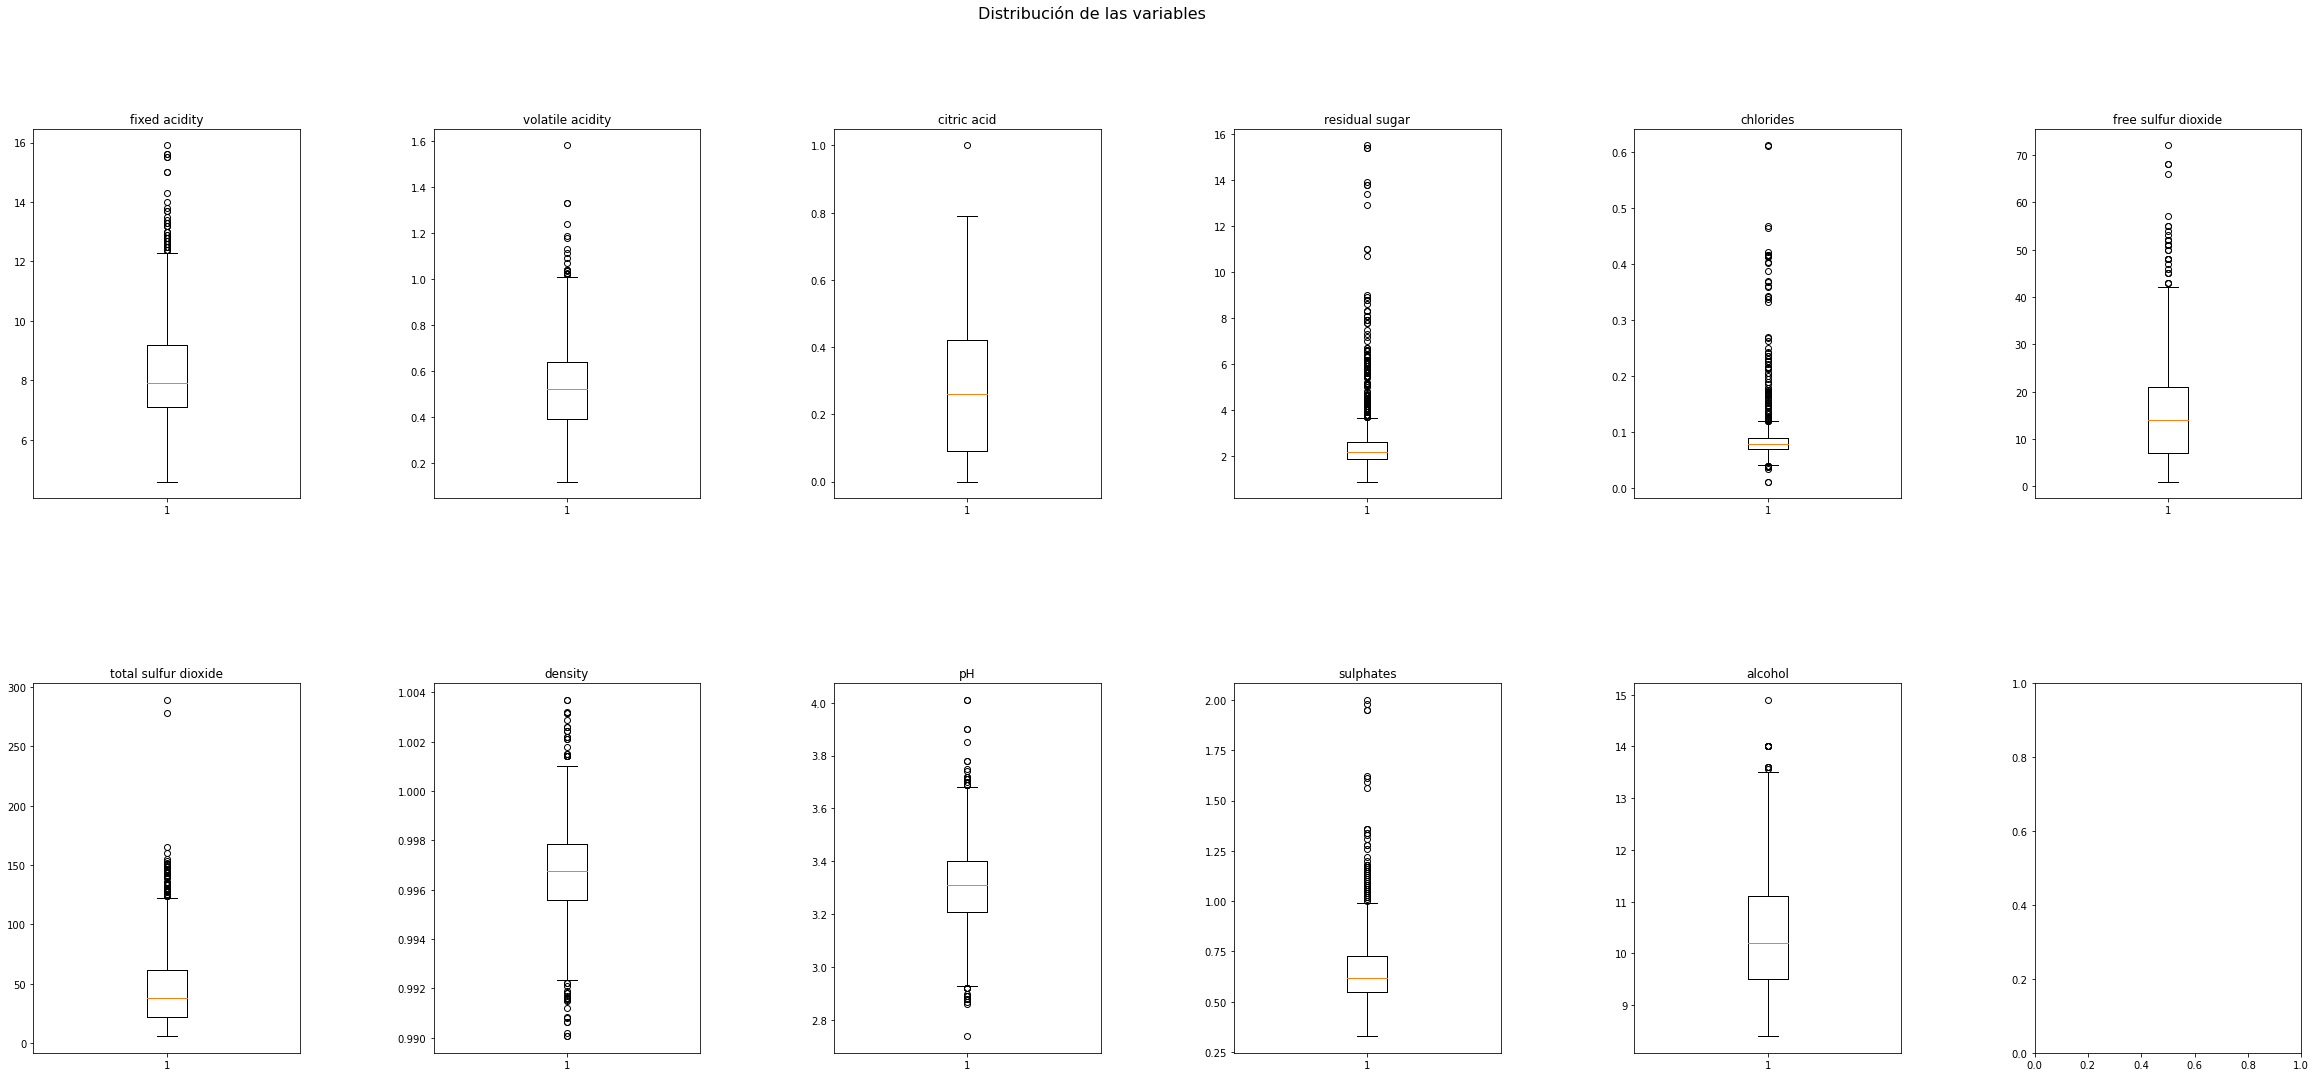

In [5]:
fig, axs = plt.subplots(2, 6, figsize=(35,17))

fig.suptitle('Distribución de las variables', fontsize=16)

axs[0, 0].boxplot(df['fixed acidity'])
axs[0, 0].set_title('fixed acidity')

axs[0, 1].boxplot(df['volatile acidity'])
axs[0, 1].set_title('volatile acidity')

axs[0, 2].boxplot(df['citric acid'])
axs[0, 2].set_title('citric acid')

axs[0, 3].boxplot(df['residual sugar'])
axs[0, 3].set_title('residual sugar')

axs[0, 4].boxplot(df['chlorides'])
axs[0, 4].set_title('chlorides')

axs[0, 5].boxplot(df['free sulfur dioxide'])
axs[0, 5].set_title('free sulfur dioxide')

axs[1, 0].boxplot(df['total sulfur dioxide'])
axs[1, 0].set_title('total sulfur dioxide')

axs[1, 1].boxplot(df['density'])
axs[1, 1].set_title('density')

axs[1, 2].boxplot(df['pH'])
axs[1, 2].set_title('pH')

axs[1, 3].boxplot(df['sulphates'])
axs[1, 3].set_title('sulphates')

axs[1, 4].boxplot(df['alcohol'])
axs[1, 4].set_title('alcohol')

fig.subplots_adjust(left=0.08, right=0.98,hspace=.5, wspace=.5)

plt.show()


**Se genera lista con el nombre de las variables para manipularlas**

In [6]:
list_vars = df.columns.values.tolist()
list_vars

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

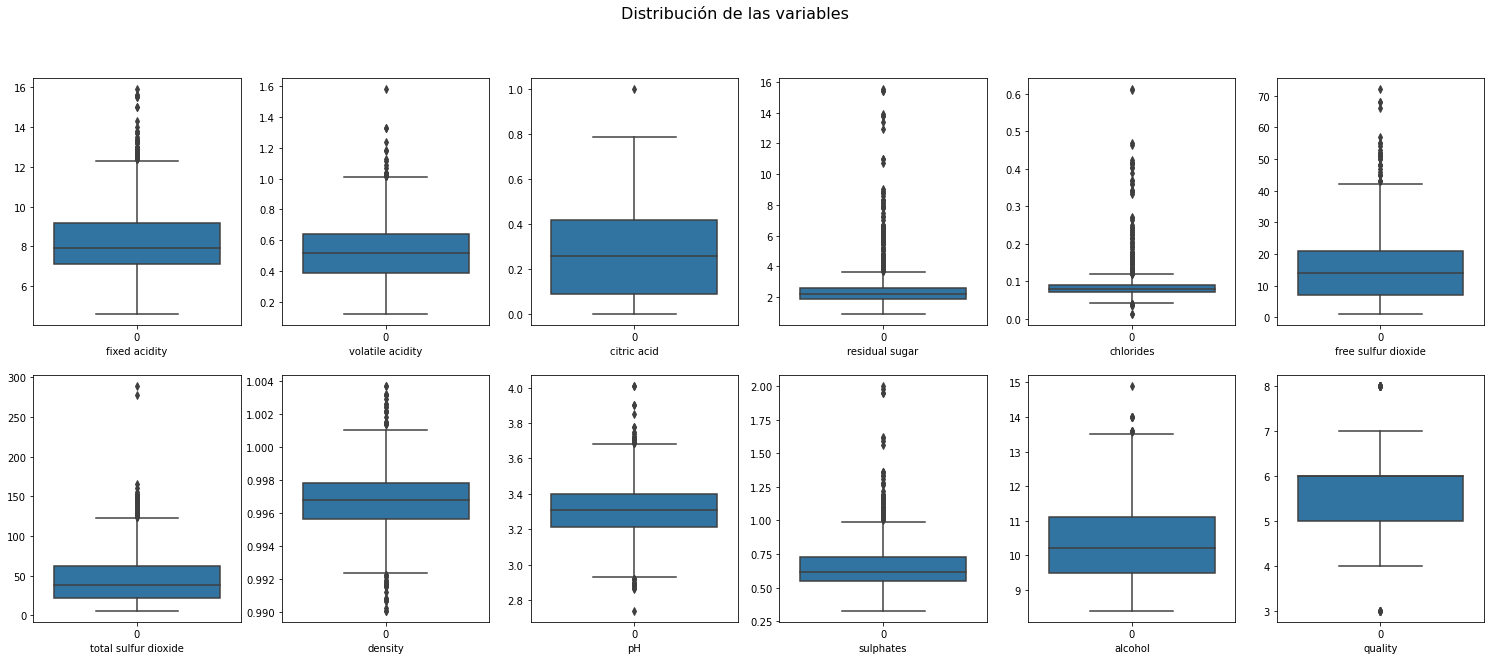

In [7]:
# Se crea una figura con subplots de dimension 2x(len(list_vars))
cols = int(len(list_vars)/2)
fig_boxplot, axs_boxplot = plt.subplots(nrows=2, ncols=cols, figsize = (26,10))
fig_boxplot.suptitle('Distribución de las variables', fontsize=16)
i, j = 0,0
for var in list_vars:
    sns.boxplot(data = df[var], ax = axs_boxplot[j,i])
    axs_boxplot[j,i].set_xlabel(var)
    if i >= cols-1:
        i = 0
        j +=1
    else:
        i +=1

#### Distribución de las calidades

<AxesSubplot:>

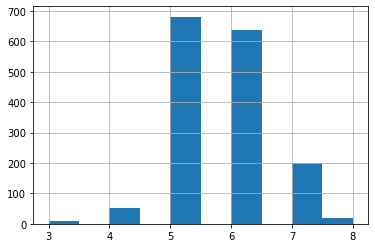

In [8]:
df.quality.hist()

<AxesSubplot:xlabel='quality', ylabel='Count'>

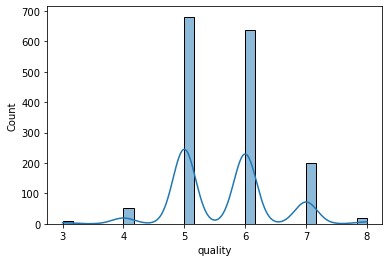

In [9]:
fig_histplot, axs_histplot = plt.subplots(nrows= 1, ncols = 1)
sns.histplot(data = df, x = 'quality', kde = True, ax = axs_histplot, fill = True)

In [10]:
print(df.quality.value_counts(normalize=True))
print(df.quality.value_counts())

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:ylabel='quality'>

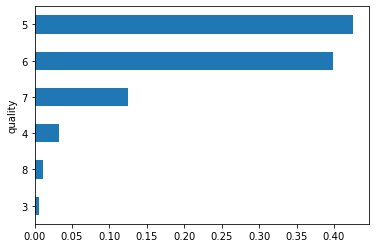

In [11]:
df.quality.value_counts(normalize=True, ascending=True).plot(kind = 'barh', xlabel = 'quality', ylabel = '%')

La gran mayoría de las observaciones corresponden a vinos de calidad media. Esto podría sesgar a los algoritmos de clasificación ya que éstos no tendrán mucha información como para reconocer patrones en vinos con calidades cercanas a cero o a diez. Podemos notar que hay muy pocos vinos "malos", considerando el prestigio de la marca esto es exactamente lo que se esperaría en la vida real. 

Para las clases imbalanceadas podríamos aplicar un **oversampling** añadiendo puntos cercanos a los ya existentes siempre y cuando estemos seguros de que la distancia entre estas clases y las demás sea lo suficientemente grande como para generar nuevas observaciones "lejanas" de las reales para evitar el overfitting y al mismo tiempo evitar que los nuevos datos se traslapen con las otras clases.

Otra opción sería establecer nuevas categorías. Por ejemplo, todos los vinos con calidad menor a 5 clasificarlos como "Malos" y los que tengan calidad mayor o igual que 5 clasificarlos como buenos. De acuerdo a la cantidad de elementos en cada clase también podríamos proponer tres categorías: Malo ($\text{quality} \in \{3,4\}$), Regular ($\text{quality} \in \{5,6\}$) y Bueno ($\text{quality} \in \{7,8\}$)

#### Matriz de correlación

<AxesSubplot:>

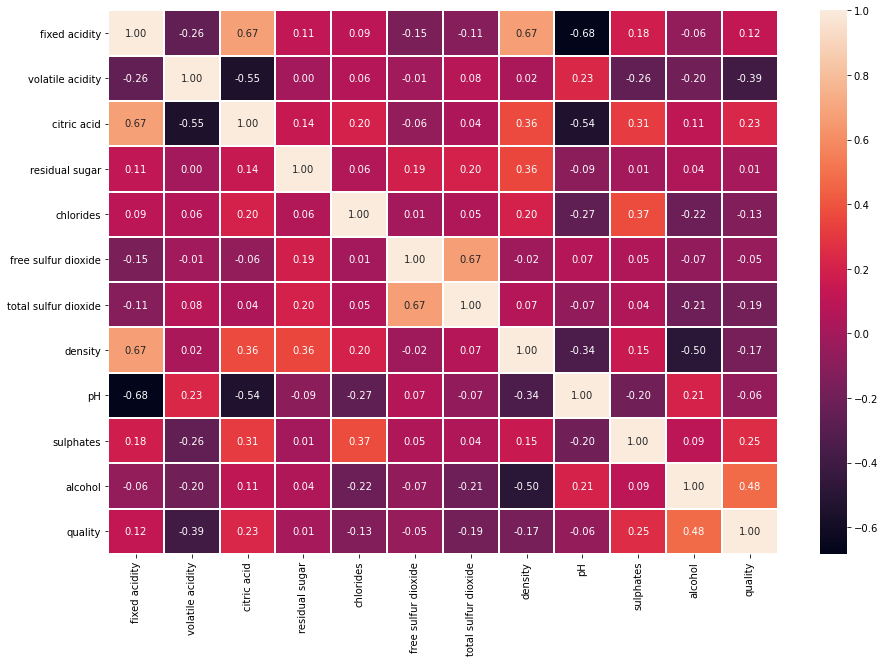

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt='.2f', linewidths=2)

**Correlaciones**

* Fixed acidity
    * citric acid (.67)
    * density (.67)
    * pH (-.68)
* volatile acidity
    * citric acid (-.55)
* citric acid
    * pH (-.54)
* free sulfur dioxide
    * total sulfur dioxide (.66) 
* Density
    * alcohol (-.50)

En el dataframe original logran apreciarse muy pocas correlaciones y son muy débiles (únicamente se consideraron las correlaciones >= .5). Vamos a realizar el mismo procedimiento pero ahora agrupando los datos por calidad

#### Distribución de las variables agrupando los datos por calidad

* Existen muchos outliers 
* La **acidez volátil** parece decrecer conforme aumenta la calidad
* El **ácido cítrico** parece aumentar conforme aumenta la calidad
* Los **sulfatos** parecen aumentar conforme aumenta la calidad
* El **alcohol** parece aumentar conforme aumenta la calidad

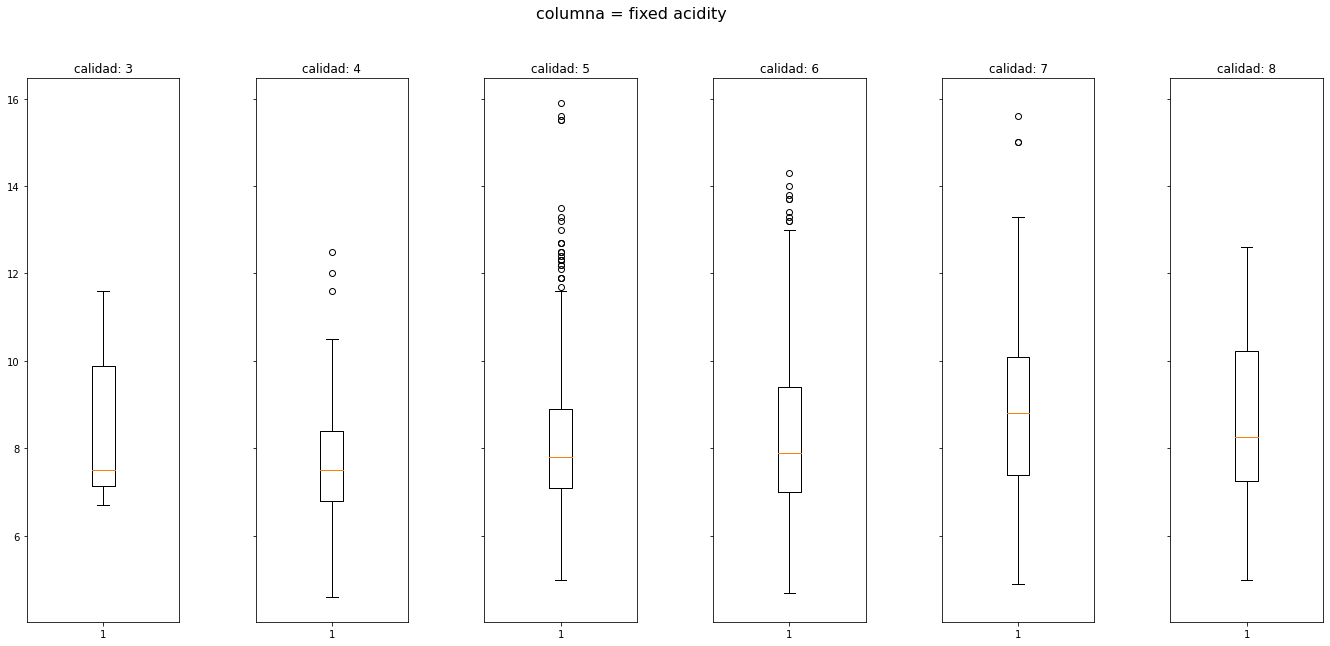

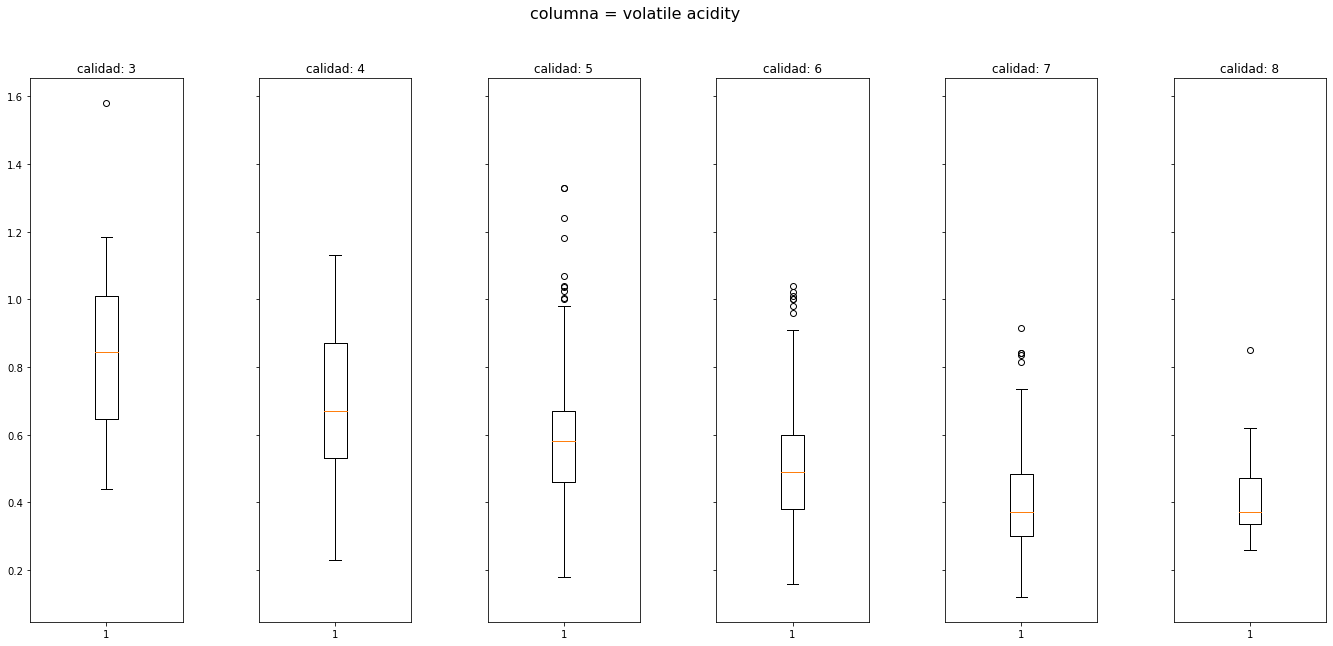

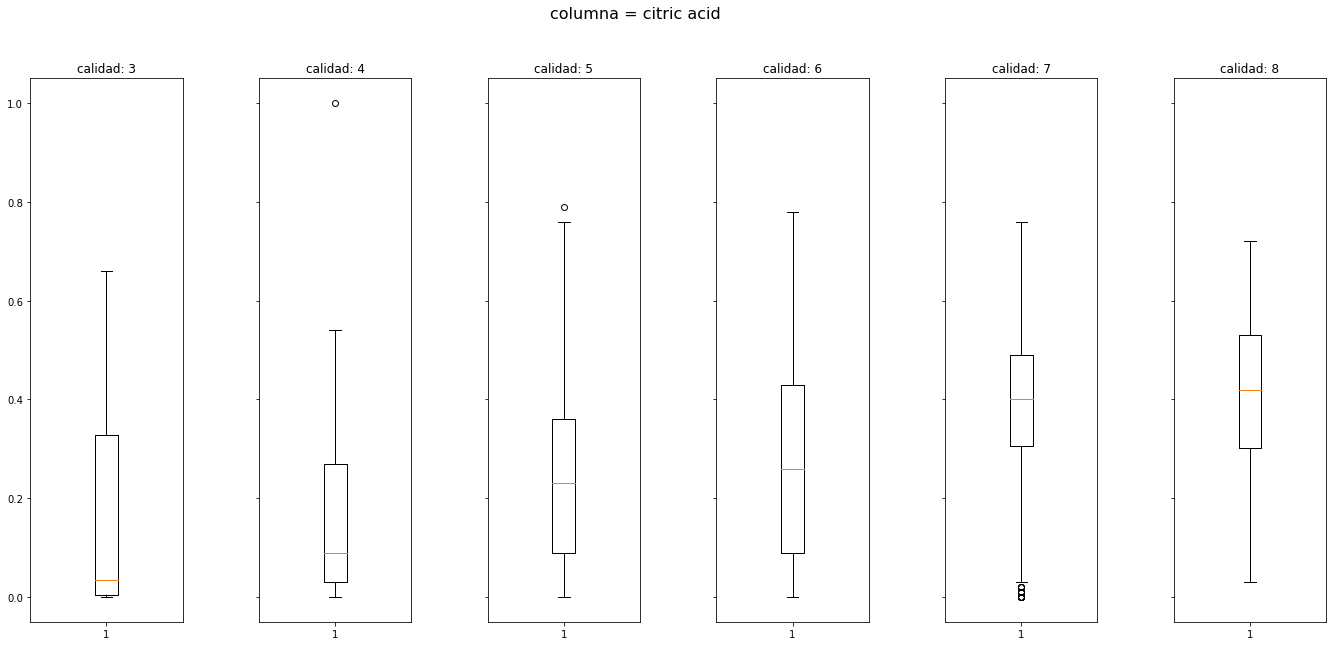

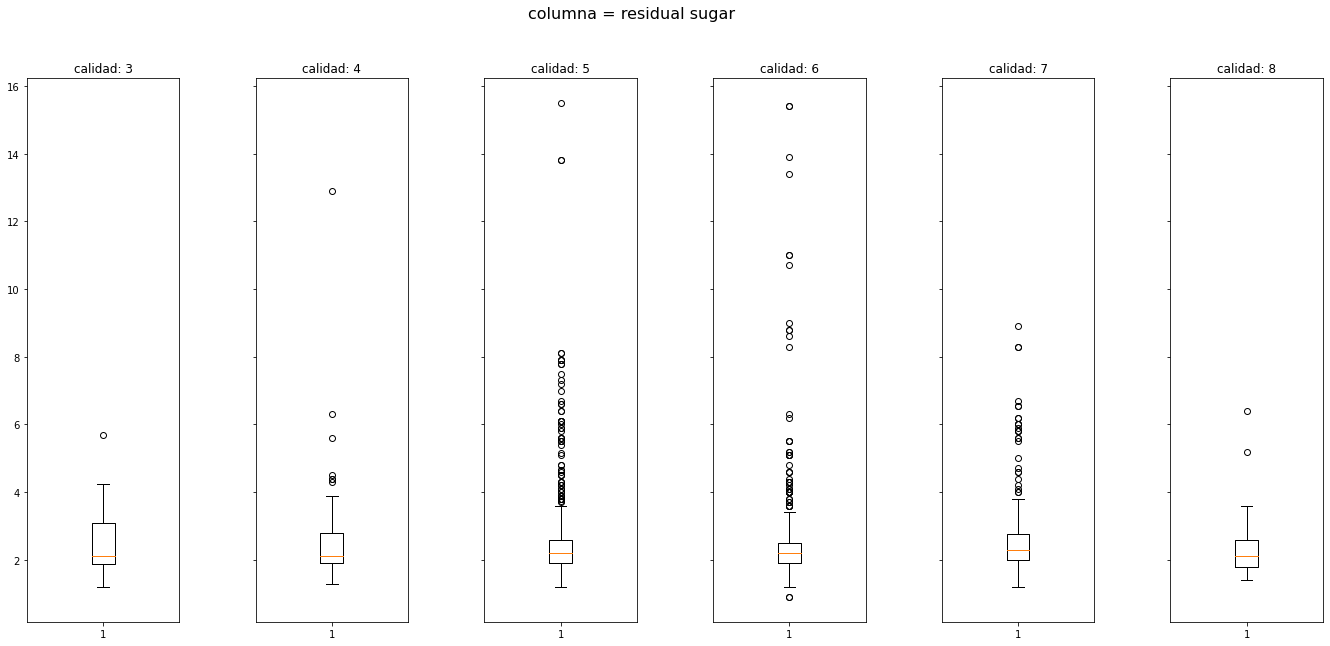

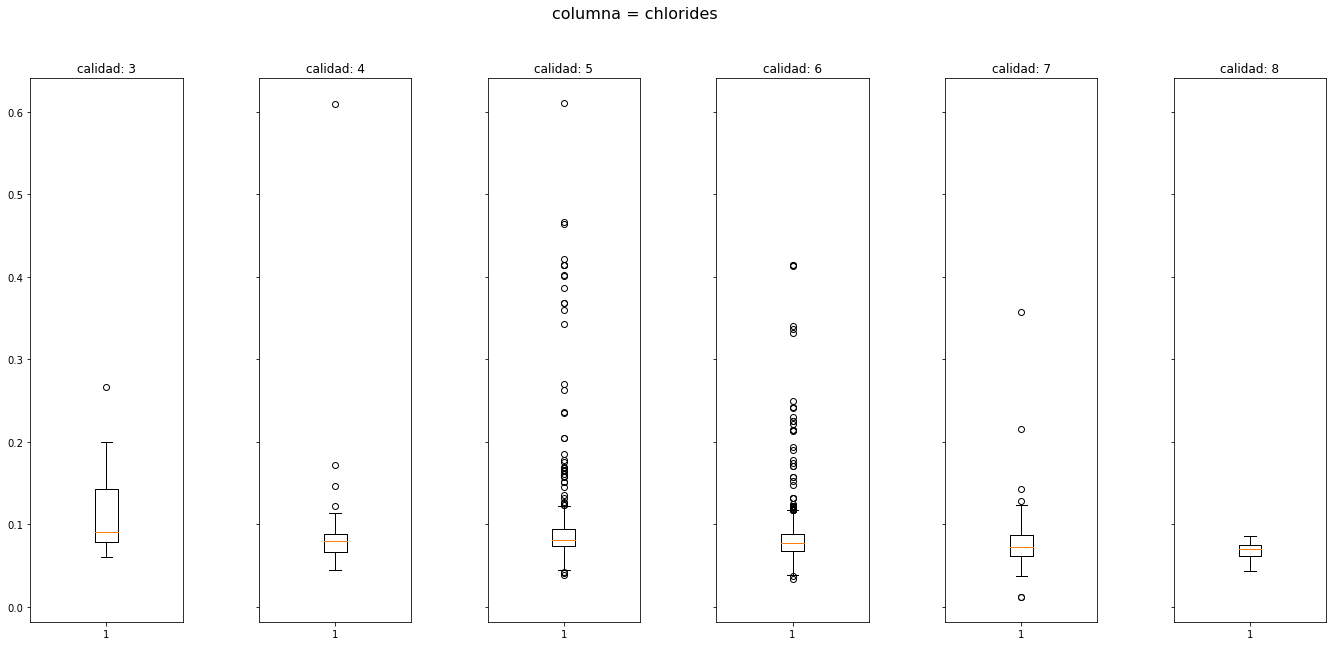

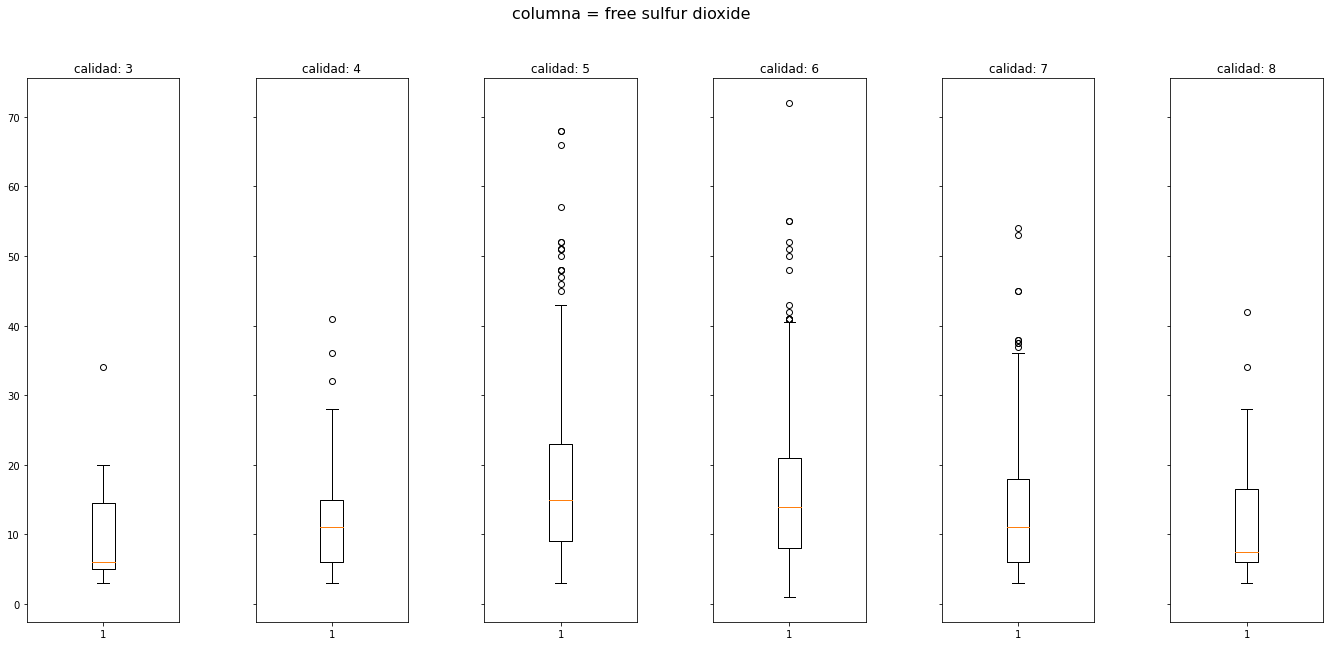

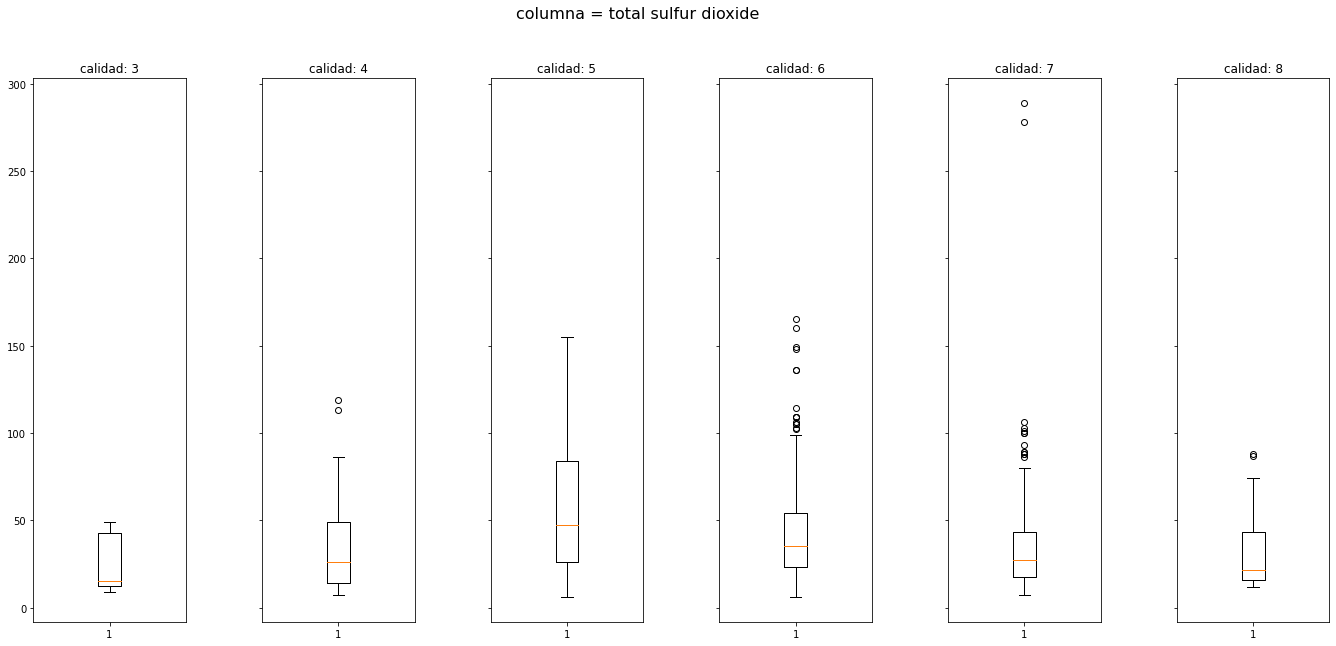

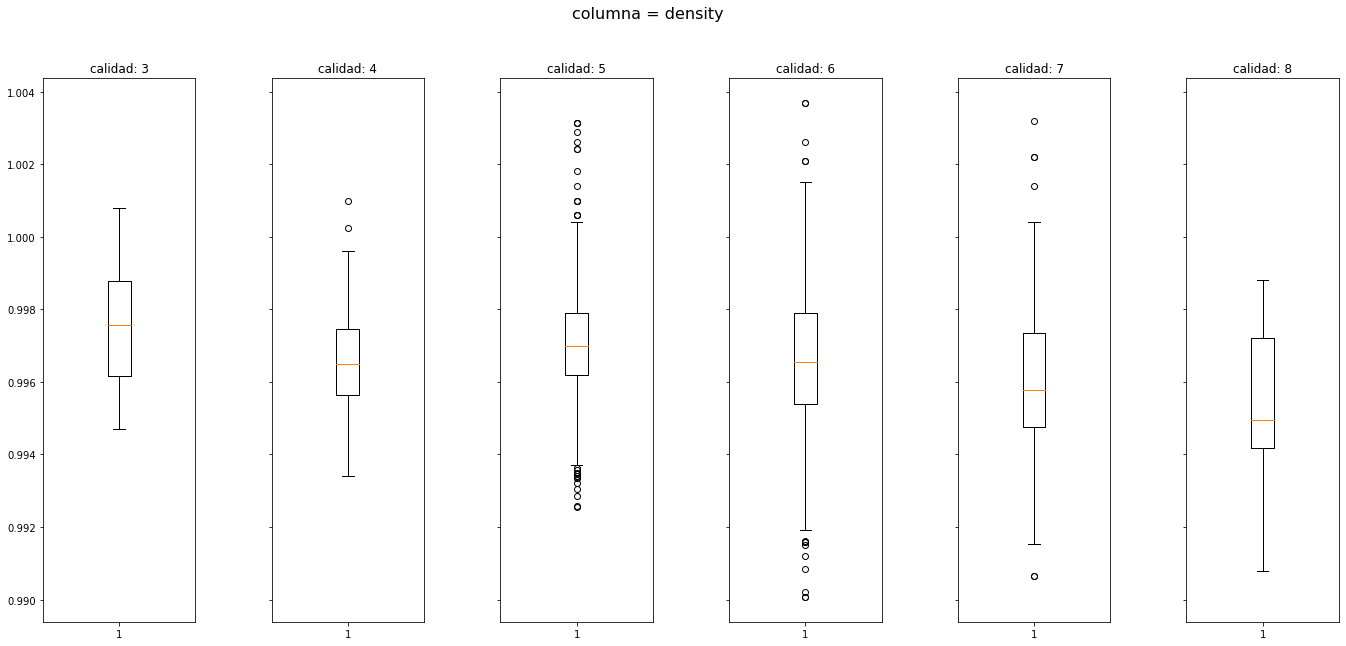

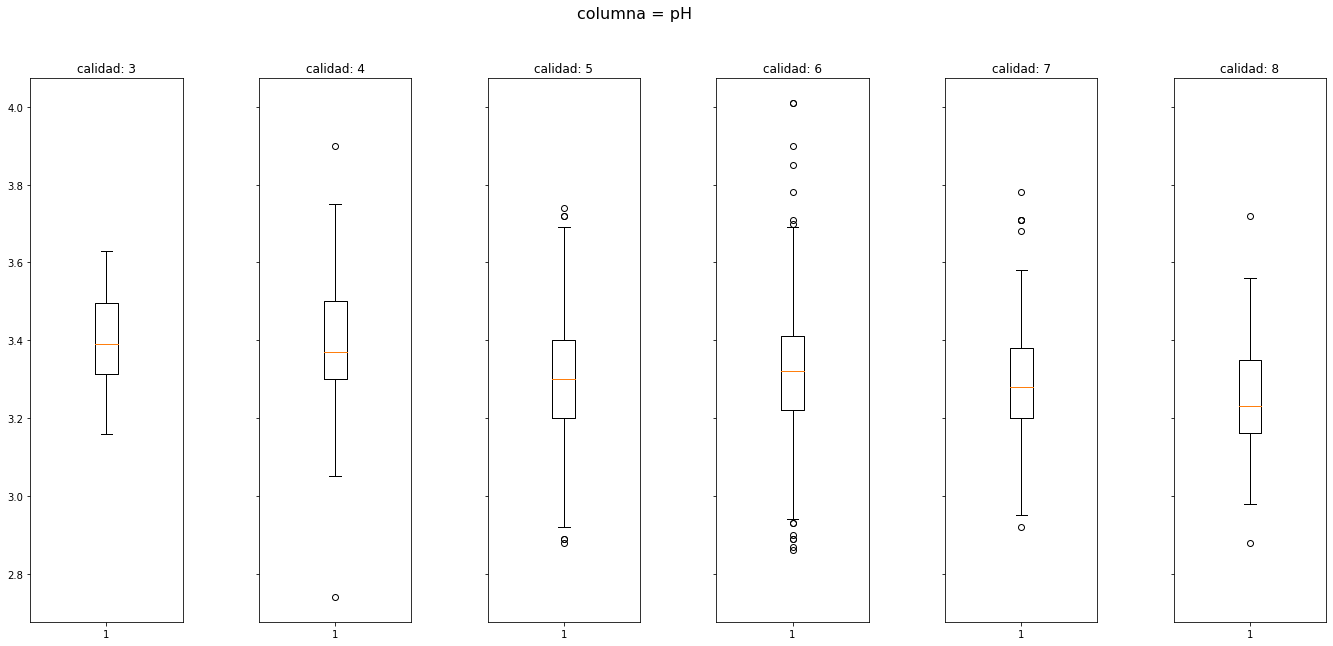

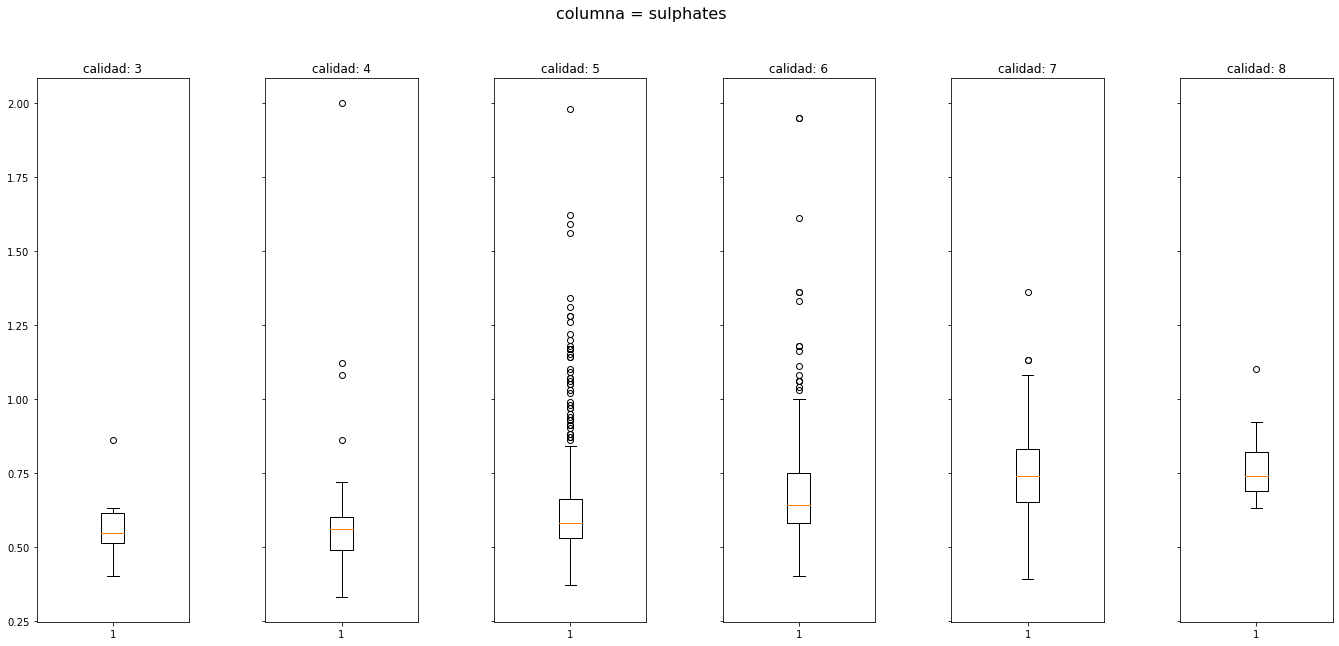

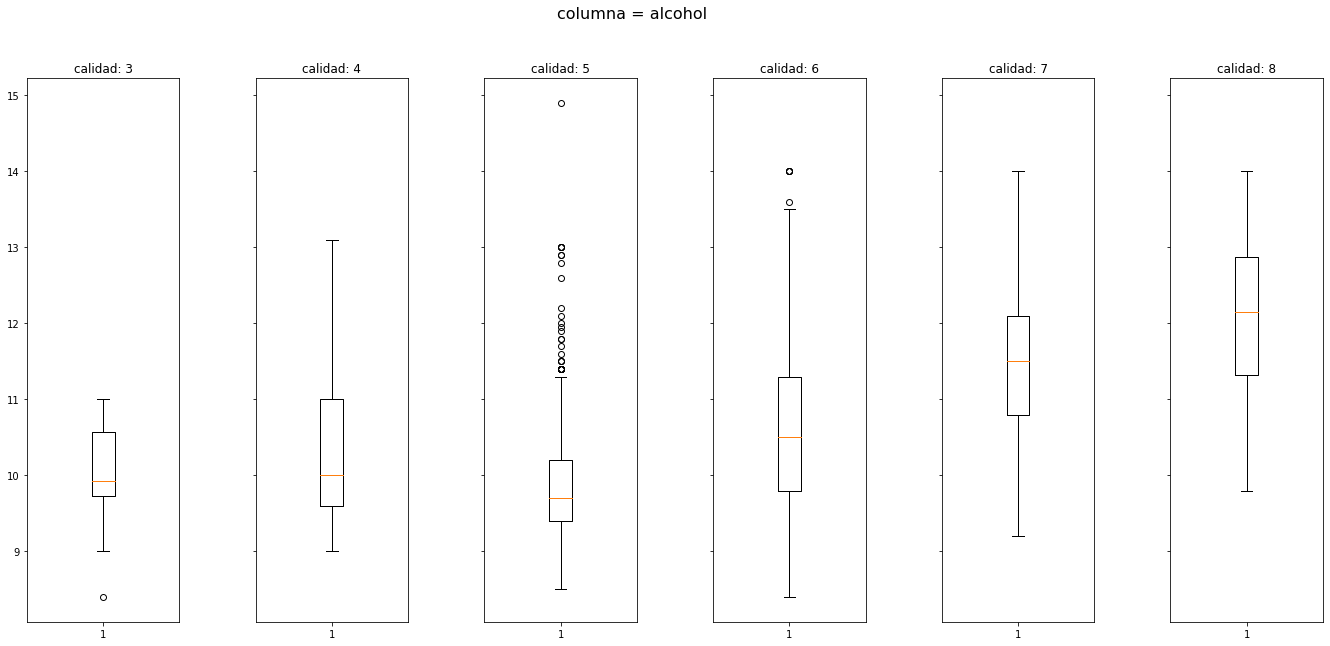

In [13]:
df_grouped = df.groupby('quality')

for c in df.columns[:-1]:
    i = 0
    fig, axs = plt.subplots(1, 6, figsize=(20,10), sharey=True)
    fig.suptitle(f'columna = {c}', fontsize=16)
    for g in df_grouped.groups:
        axs[i].boxplot(df_grouped.get_group(g)[c])
        axs[i].set_title(f'calidad: {g}')


        i += 1
        
    fig.subplots_adjust(left=0.08, right=0.98,hspace=.5, wspace=.5)
    plt.show()


#### Matrices de correlación para los datos agrupdos por calidad

**Correlaciones más recurrentes**

* Fixed acidity siempre está correlacionada positivamente con:
    * citric acid [.96, .54, .62, .67, .63, .88]
    * density [.80, .71, .68, .70, .77, .84]
    * pH [-.58, -.67, -.63, -.71, -.76, -.83]
* Citric acid correlacionada negativamente casi siempre con:
    * pH [-.68, -.63, nan, -.54, -.71, -.79]
* Free sulfur dioxide siempre correlacionado positivamente con:
    * total sulfur dioxide [.79, .60, .68, .66, .65, .71]

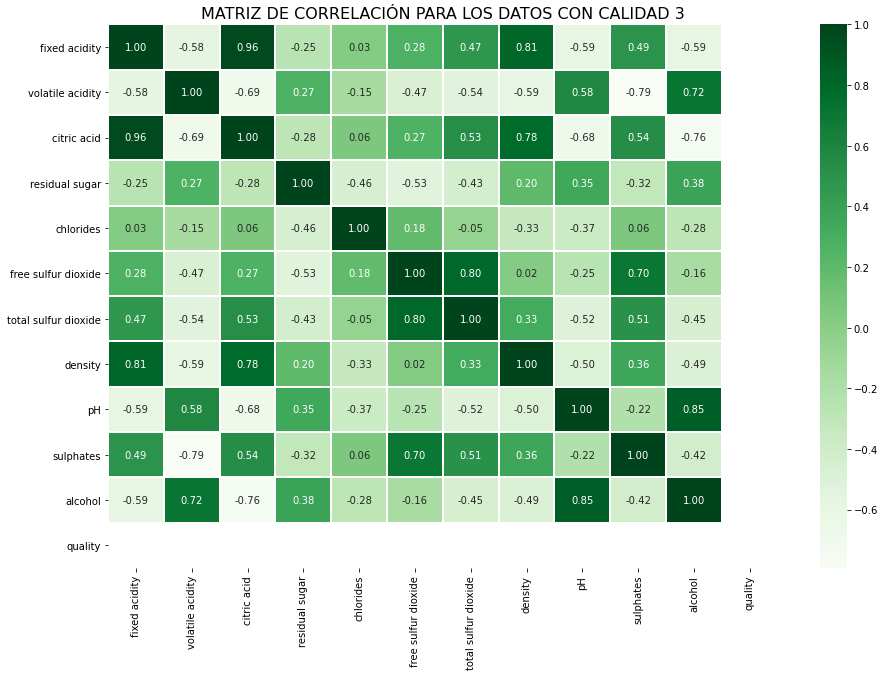

CORRELACIONES ENCONTRADAS
* fixed acidity
    * volatile acidity (-0.5782163274419776)
    * citric acid (0.9622918822626697)
    * density (0.8052177266822543)
    * pH (-0.5866132838664225)
    * alcohol (-0.5877737055026588)
* volatile acidity
    * citric acid (-0.6926838541929177)
    * total sulfur dioxide (-0.5390562951583671)
    * density (-0.5935607088488383)
    * pH (0.5780232877987327)
    * sulphates (-0.7922405786983621)
    * alcohol (0.7173915692883163)
* citric acid
    * total sulfur dioxide (0.5281377047001529)
    * density (0.779401589323081)
    * pH (-0.6815223731821849)
    * sulphates (0.5351036125745393)
    * alcohol (-0.7559584373430311)
* residual sugar
    * free sulfur dioxide (-0.5285586003964009)
* chlorides
* free sulfur dioxide
    * total sulfur dioxide (0.7992772173208451)
    * sulphates (0.702261618528272)
* total sulfur dioxide
    * pH (-0.5170919348902231)
    * sulphates (0.5059211239073164)
* density
* pH
    * alcohol (0.850144168704562)
* 

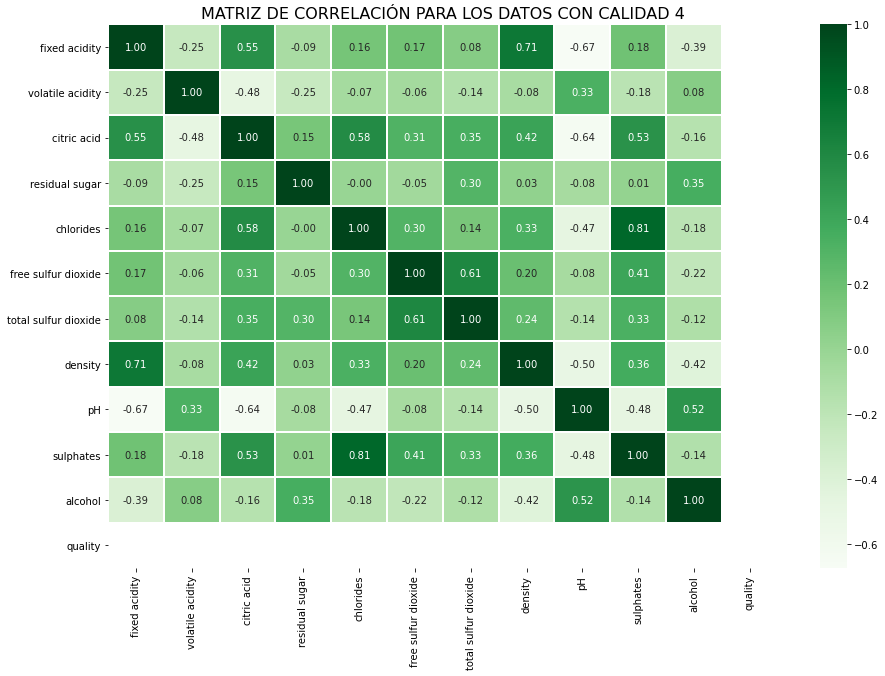

CORRELACIONES ENCONTRADAS
* fixed acidity
    * citric acid (0.5461973814071301)
    * density (0.7111781035175072)
    * pH (-0.6742223917970696)
* volatile acidity
* citric acid
    * chlorides (0.5758871071108692)
    * pH (-0.6377543046310636)
    * sulphates (0.5317052943939805)
* residual sugar
* chlorides
    * sulphates (0.8128638111990801)
* free sulfur dioxide
    * total sulfur dioxide (0.6090252284786477)
* total sulfur dioxide
* density
* pH
    * alcohol (0.5218292348153704)
* sulphates
* alcohol
* quality
------------------------------------------------------------------------------------------------------------------------




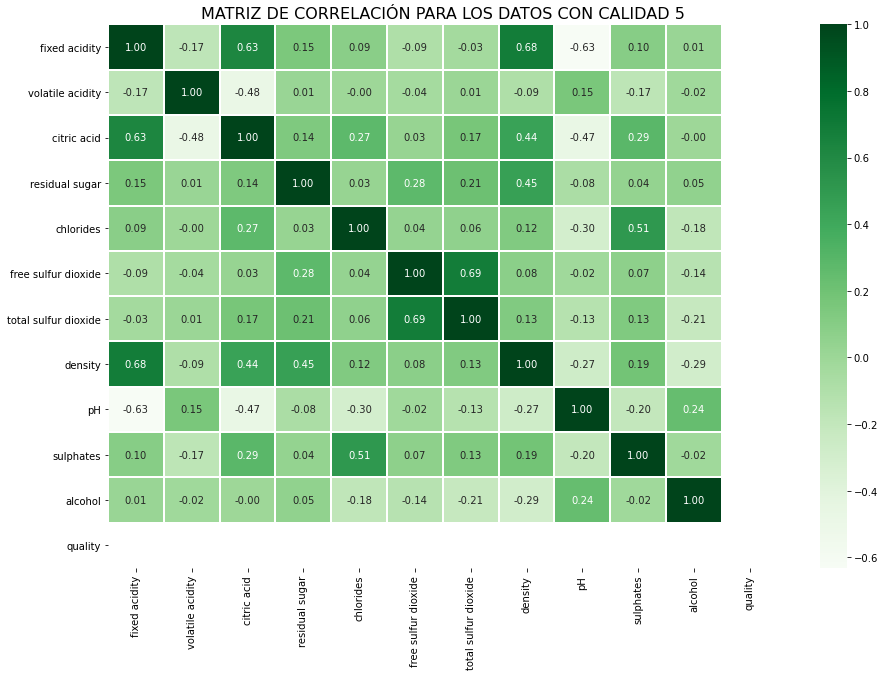

CORRELACIONES ENCONTRADAS
* fixed acidity
    * citric acid (0.626558485060666)
    * density (0.6837099574095701)
    * pH (-0.6317505437551855)
* volatile acidity
* citric acid
* residual sugar
* chlorides
    * sulphates (0.5090212075627989)
* free sulfur dioxide
    * total sulfur dioxide (0.6866258126460131)
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality
------------------------------------------------------------------------------------------------------------------------




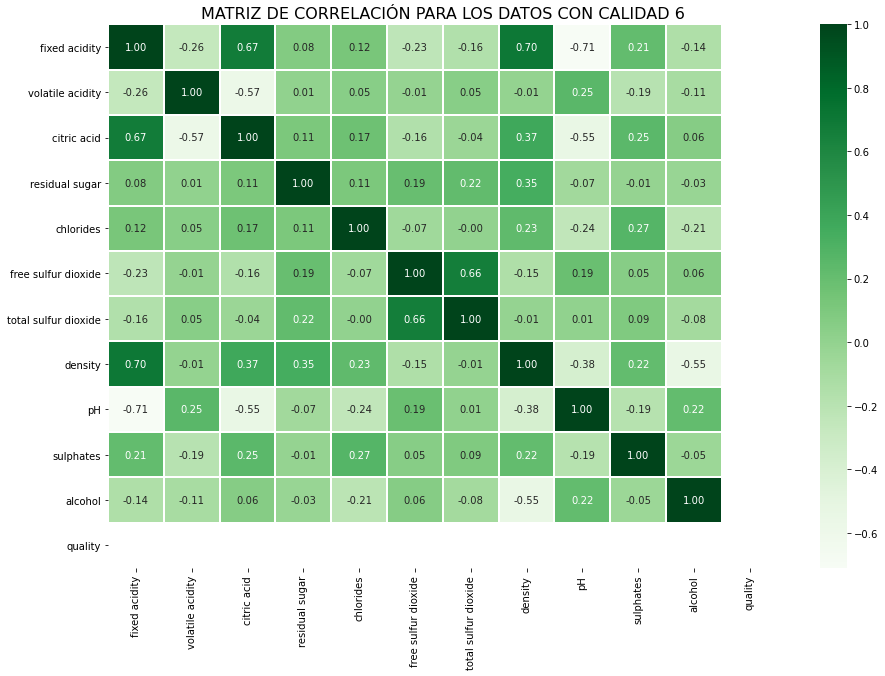

CORRELACIONES ENCONTRADAS
* fixed acidity
    * citric acid (0.6743877996720291)
    * density (0.700432134969235)
    * pH (-0.7101335089668771)
* volatile acidity
    * citric acid (-0.5720388065319407)
* citric acid
    * pH (-0.5464403379026918)
* residual sugar
* chlorides
* free sulfur dioxide
    * total sulfur dioxide (0.6647098526085127)
* total sulfur dioxide
* density
    * alcohol (-0.547122585661426)
* pH
* sulphates
* alcohol
* quality
------------------------------------------------------------------------------------------------------------------------




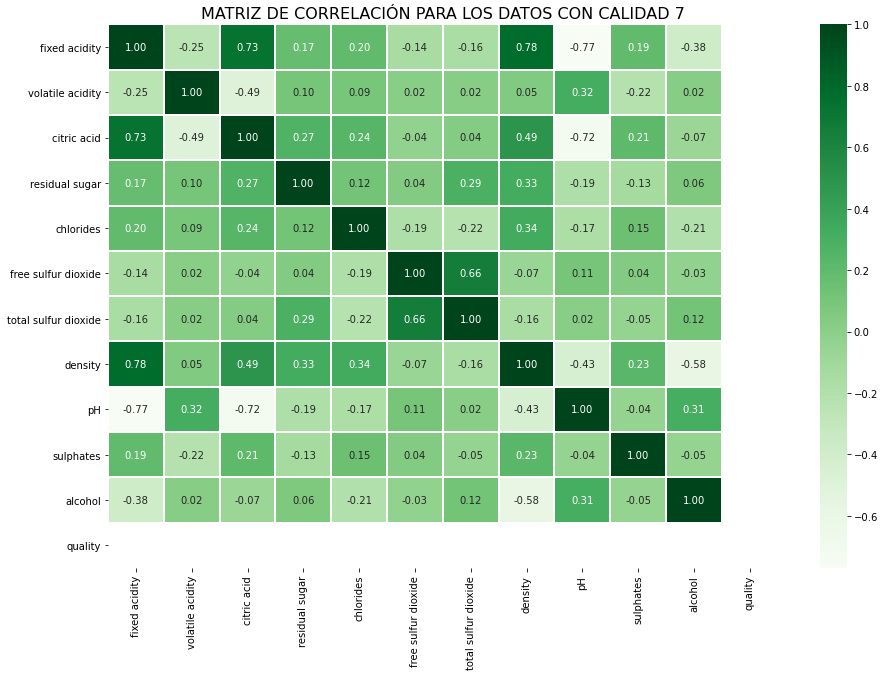

CORRELACIONES ENCONTRADAS
* fixed acidity
    * citric acid (0.7340707167389017)
    * density (0.7761168460937818)
    * pH (-0.7695802807016953)
* volatile acidity
* citric acid
    * pH (-0.7154737997506834)
* residual sugar
* chlorides
* free sulfur dioxide
    * total sulfur dioxide (0.6583534317924784)
* total sulfur dioxide
* density
    * alcohol (-0.5817180273383539)
* pH
* sulphates
* alcohol
* quality
------------------------------------------------------------------------------------------------------------------------




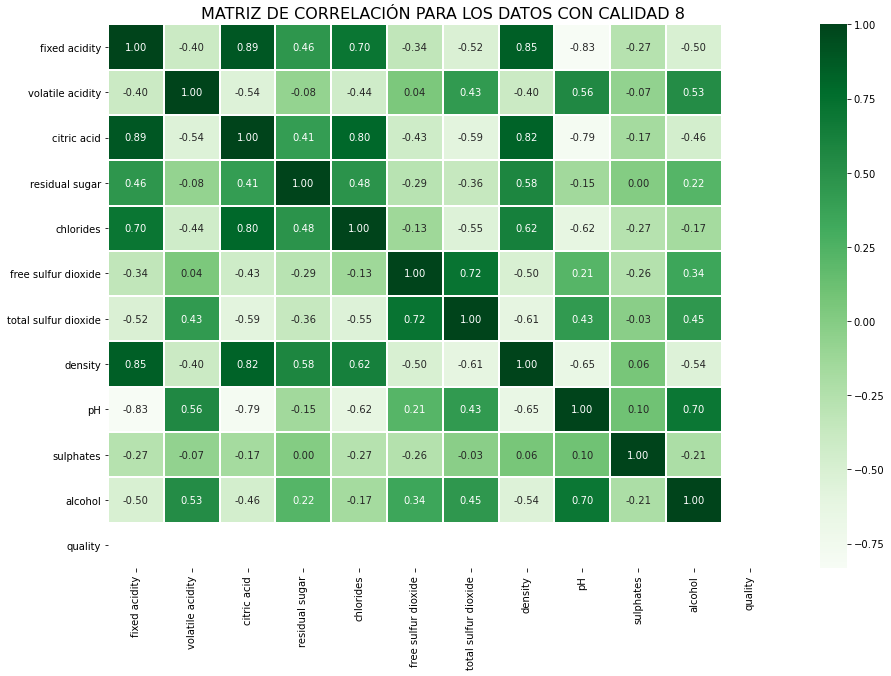

CORRELACIONES ENCONTRADAS
* fixed acidity
    * citric acid (0.8864953761635496)
    * chlorides (0.7016592378874971)
    * total sulfur dioxide (-0.5163680448704715)
    * density (0.8479003757470014)
    * pH (-0.8319152304786719)
* volatile acidity
    * citric acid (-0.5408872416416037)
    * pH (0.562766603324483)
    * alcohol (0.5327111997893227)
* citric acid
    * chlorides (0.7960088259184588)
    * total sulfur dioxide (-0.5857206843307422)
    * density (0.8236385104225504)
    * pH (-0.7900043017626711)
* residual sugar
    * density (0.5797231322874936)
* chlorides
    * total sulfur dioxide (-0.5455405621526669)
    * density (0.623528197810617)
    * pH (-0.6182786045016032)
* free sulfur dioxide
    * total sulfur dioxide (0.7170981435279609)
    * density (-0.5010566138477283)
* total sulfur dioxide
    * density (-0.6143616066538543)
* density
    * pH (-0.6462490749054074)
    * alcohol (-0.5434650068409598)
* pH
    * alcohol (0.6983831451029143)
* sulphates
* alco

In [14]:
for g in df_grouped.groups:
    cor_matrix = df_grouped.get_group(g).corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(cor_matrix, annot=True, fmt='.2f', linewidths=2, cmap="Greens").set_title(f"MATRIZ DE CORRELACIÓN PARA LOS DATOS CON CALIDAD {g}", fontsize=16)
    plt.show()
    n_vars = len(cor_matrix)
    print("CORRELACIONES ENCONTRADAS")
    for i in range(n_vars):
        print(f"* {cor_matrix.columns[i]}")
        for j in range(i+1, n_vars):
            value = cor_matrix.iloc[i, j]
            if abs(value) >= .5:
                print(f"    * {cor_matrix.columns[j]} ({value})")
    print("------------------------------------------------------------------------------------------------------------------------\n\n")
                

        

Cuando agrupamos los datos podemos apreciar correlaciones más fuertes entre las variables

### **Verificar la calidad de los datos**: Informe de calidad de los datos

El conjunto de datos no tiene valores perdidos, lo cual siempre se agradece; sin embargo, existe un desbalance extremo entre los diferentes niveles de calidad:

| Calidad | n | % | 
| - | - | - |
| 0 | 0 | 0% |
| 1 | 0 | 0% |
| 2 | 0 | 0% |
| 3 | 10 | 0.62% |
| 4 | 53 | 3.31% |
| 5 | 681 | 42.58% |
| 6 | 638 | 39.89% |
| 7 | 199 | 12.44% |
| 8 | 18 | 1.12% |
| 9 | 0 | 0% |
| 10 | 0 | 0% |

Las muestras se concentran entre el nivel 5 y 6 de calidad, es decir, vinos aceptables o normales. El desbalance de las categorías 0-3 suponemos es intrínseco a la naturaleza de los datos y creemos que representa a la realidad, puesto que los vinos analizados provienen de un fabricante que maneja estándares de calidad elevados. En las categorías 7-10 el desbalance puede deberse a la subjetividad del método con el que fueron evaluados, pues se realizó de una forma totalmente sensorial y dependiente de los catadores humanos.

Consideramos que los datos son representativos de la realidad porque es muy difícil encontrar vinos muy malos y al mismo tiempo no es tan común encontrar vinos excelentes; sin embargo, para un algoritmo de clasificación lo ideal sería contar con aproximadamente el mismo número de ejemplos en cada categoría. Si deseamos clasificar los vinos en once categorías (0-10) este conjunto de datos no tiene la calidad necesaria porque no existe información alguna para la mitad de las calidades. Pero si agrupamos los datos para formar menos categorías o estamos interesados únicamente en las que sí cuentan con observaciones, entonces los datos son de calidad.

## **Preparación de los datos**

## Agrupamiento de datos por calidad, malo, regular y bueno.

In [92]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [105]:
conditions = [
    (df.quality.isin([3,4])),
    (df.quality.isin([5,6])),
    (df.quality.isin([7,8])),
]
quality_tags = ['malo', 'regular', 'Bueno']

df_1 = df.copy()
df_1["CAT quality"] = np.select(conditions, quality_tags)

In [106]:
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,CAT quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,regular
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,regular
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,regular
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular


In [95]:
df_1['CAT quality'].hist()

<AxesSubplot:>

### **Conjunto de datos**: Descripción del conjunto de datos

Como ya se ha mencionado anteriormente, el clasificador se construirá a partir de las 1,599 observaciones contenidas en el archivo `winequality-red.csv`. Cada ejemplo se compone de 11 variables fisico-químicas pertenecientes a una muestra única del vino portugués *Vinho verde* y su nivel de calidad que va desde 0 (muy malo) a 10 (excelente).

### **Seleccionar los datos**: Razonamiento para inclusión/exclusión

Para la construcción del clasificador se utlizarán todos los datos disponibles. No es necesario tomar algún subconjunto porque todas las observaciones están completas y son correctas; por lo tanto, tienen la calidad suficiente. Además no existen limitaciones en cuanto al volumen de información que se debe utilizar.

### **Limpiar los datos**: Informe de limpieza de datos

**Detección y filtado de Outliers** 

In [107]:
# Porcentaje de outliers
contamination = 0.35

# Entrenamiento de MCD
clf_name = 'MCD'
clf = MCD(contamination=contamination)
clf.fit(df_1.iloc[:,:-1])

# Obtener etiquetas predichas y scores de outliers de la data de entrenamiento
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# Predicción con PV de entrada
y_test_pred = clf.predict(df_1.iloc[:,:-1])  # Etiqueta de outliers (0 or 1)
y_test_scores = clf.decision_function(df_1.iloc[:,:-1])  # outlier scores

count = 0
for i in y_test_pred:
    count += i
    
# Cantidad de outliers detectados en la Data
count, y_test_pred

(560, array([0, 0, 0, ..., 0, 0, 1]))

In [130]:
# rename cols
rename_col_list = {
    'free sulfur dioxide':'free_sulf_dio',
    'total sulfur dioxide' : 'tot_sulf_dio',
    'volatile acidity': 'volatile_acid'
    }
df_1.rename(rename_col_list, axis = 'columns', inplace= True)
df_1.columns

Index(['fixed acidity', 'volatile_acid', 'citric acid', 'residual sugar',
       'chlorides', 'free_sulf_dio', 'tot_sulf_dio', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', 'CAT quality'],
      dtype='object')

In [131]:
# lista con nombre de variables actualizadas
list_vars_rename = df_1.columns.values.tolist()[:-1]
list_vars_rename

['fixed acidity',
 'volatile_acid',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free_sulf_dio',
 'tot_sulf_dio',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [133]:
# agregar en una nueva columna la variable predicha de outliers
df_1.reset_index(drop = True, inplace = True)
y_outlier = pd.Series(y_test_pred, index = np.arange(len(y_test_pred)), name = 'Outlier_Det')
df_outlier = pd.concat([df_1, y_outlier], axis = 1)
df_outlier.head()

,fixed acidity,volatile_acid,citric acid,residual sugar,chlorides,free_sulf_dio,tot_sulf_dio,density,pH,sulphates,alcohol,quality,CAT quality,Outlier_Det
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,regular,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,regular,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,regular,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular,0


In [134]:
df_filt_outlier = df_outlier.loc[lambda df: df['Outlier_Det'] == 0, :]
df_filt_outlier.head()

,fixed acidity,volatile_acid,citric acid,residual sugar,chlorides,free_sulf_dio,tot_sulf_dio,density,pH,sulphates,alcohol,quality,CAT quality,Outlier_Det
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,regular,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,regular,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,regular,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular,0


In [135]:
# Cantidad de datos filtrados 
df_1.shape, df_filt_outlier.shape

((1599, 13), (1039, 14))

In [136]:
# Histograma por categoría de calidad para la variable de acidez fija - antes de filtrado de outliers
sns.histplot(data = df_1, x = 'fixed acidity', hue = 'CAT quality', kde = True)
# Estadisticos descriptivos
df_1.describe()

,fixed acidity,volatile_acid,citric acid,residual sugar,chlorides,free_sulf_dio,tot_sulf_dio,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [137]:
# Histograma por categoría de calidad para la variable de acidez fija - despues de filtrado de outliers
sns.histplot(data = df_filt_outlier, x = 'fixed acidity', hue = 'CAT quality', kde = True)
# Estadisticos descriptivos
df_filt_outlier.describe()

,fixed acidity,volatile_acid,citric acid,residual sugar,chlorides,free_sulf_dio,tot_sulf_dio,density,pH,sulphates,alcohol,quality,Outlier_Det
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.0
mean,8.275457,0.512132,0.250857,2.167757,0.077820,14.390760,37.728585,0.996618,3.322002,0.631453,10.371639,5.678537,0.0
std,1.595624,0.156204,0.184721,0.406534,0.013309,8.249677,21.547802,0.001638,0.132497,0.113493,0.945995,0.740145,0.0
min,5.200000,0.120000,0.000000,1.200000,0.038000,3.000000,6.000000,0.991620,2.940000,0.330000,9.000000,4.000000,0.0
25%,7.100000,0.390000,0.080000,1.900000,0.069500,7.000000,21.000000,0.995520,3.230000,0.550000,9.575000,5.000000,0.0
50%,7.900000,0.510000,0.240000,2.100000,0.078000,13.000000,33.000000,0.996600,3.330000,0.610000,10.200000,6.000000,0.0
75%,9.100000,0.627500,0.400000,2.400000,0.085000,19.000000,49.000000,0.997600,3.400000,0.700000,11.000000,6.000000,0.0
max,13.700000,0.965000,0.750000,3.600000,0.123000,46.000000,106.000000,1.001400,3.780000,1.050000,13.600000,8.000000,0.0


In [138]:
# join de dataframes raw data - inliers data 
df_full = df_1.iloc[:,:-1].join(df_filt_outlier.iloc[:,:-2], rsuffix=("_in"))
df_full.columns

Index(['fixed acidity', 'volatile_acid', 'citric acid', 'residual sugar',
       'chlorides', 'free_sulf_dio', 'tot_sulf_dio', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', 'fixed acidity_in',
       'volatile_acid_in', 'citric acid_in', 'residual sugar_in',
       'chlorides_in', 'free_sulf_dio_in', 'tot_sulf_dio_in', 'density_in',
       'pH_in', 'sulphates_in', 'alcohol_in', 'quality_in'],
      dtype='object')

In [148]:
%matplotlib inline

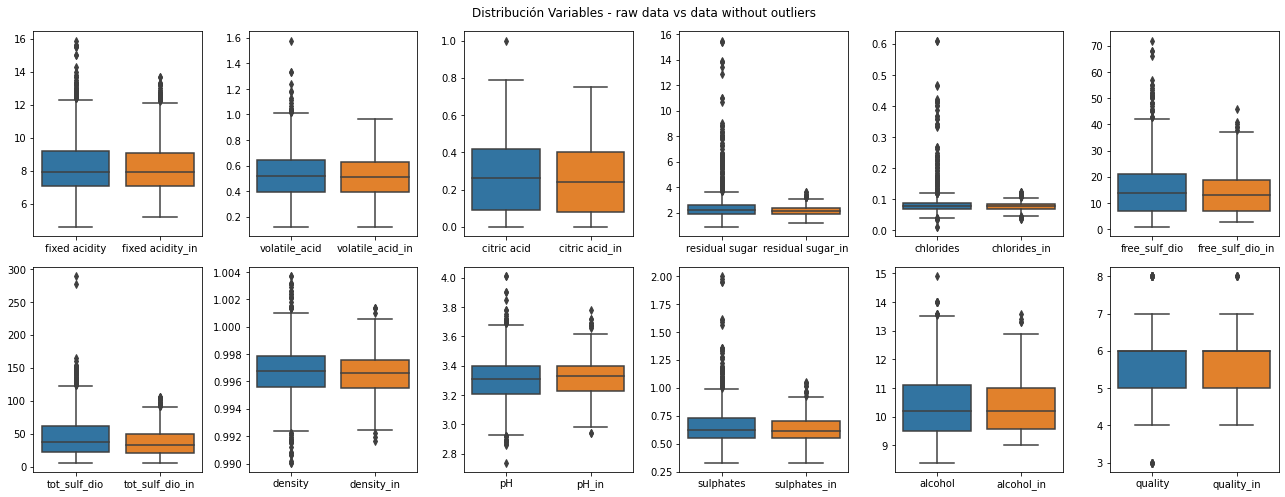

In [149]:
# Se crea una figura con subplots de dimension 2x(len(list_vars))
cols = int(len(list_vars)/2)

fig_boxplot, axs_boxplot = plt.subplots(nrows=2, ncols=cols, figsize = (18,7))
fig_boxplot.suptitle('Distribución Variables - raw data vs data without outliers', fontsize=12)
i, j = 0,0
for var in list_vars_rename:
    sns.boxplot(data = df_full[[var, var +'_in']], ax = axs_boxplot[j,i])
    if i >= cols-1:
        i = 0
        j +=1
    else:
        i +=1
fig_boxplot.tight_layout()
plt.show()

<AxesSubplot:>

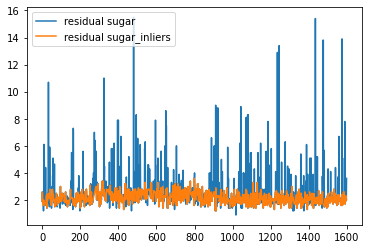

In [157]:
fig_out , ax_out = plt.subplots(nrows=1, ncols=1)
df_1.plot(kind = 'line', y ='residual sugar', ax = ax_out)
df_filt_outlier.plot(kind = 'line', y = 'residual sugar', ax = ax_out, label = 'residual sugar_inliers')

...

### **Construir los datos**: Atributos derivados y registros generados

...

### **Integrar los datos**: Combinación de datos

...

### **Formateo de los datos**: Datos reformateados

...

## **MODELADO**

### **Escoger la técnica de modelado**: Tpexnica de modelado y presunciones del modelado

...

### **Generación del plan de prueba**: Plan de prueba

...

### **Construir el modelo**: Ajustes de parámetros, modelos y descripciones de los modelos

...

### **Evaluar el modelo**: Evaluación del modelo y ajustes de parámetros revisados

...